# Desambiguación del sentido de las palabras

La desambiguación de palabras es una de las tareas comunes en Procesamiento de Lenguaje Natural (NLP por sus siglas en inglés) en donde se pueden aplicar métodos basados en aprendizaje supervisado, semi-supervisado y no supervisado para habilitar algoritmos que logren desambiguar palabras en contextos específicos. En este notebbok se exploran diferentes formas de solucionar la tarea de desambigaur palabras en idioma inglés con diferentes frameworks y técnicas del estado del arte.


# Librerías utilizadas

- NLTK: https://www.nltk.org/install.html
- Seaborn
- Matplotlib
- Gensim


# Datasets utilizados

 - corpus etiquetado en inglés llamado **Senseval 2** displonible en la librería NLTK. http://www.nltk.org/howto/corpus.html


# Dercarga del dataset

In [1]:
import nltk
nltk.download('senseval')
from nltk.corpus import senseval

[nltk_data] Downloading package senseval to
[nltk_data]     /Users/josemiguel/nltk_data...
[nltk_data]   Package senseval is already up-to-date!


El corpus **Senseval 2** contiene datos etiquetados que sirven para entrenar un clasificador que permita desambiguar el sentido de las palabras. Cada elemento del corpus **Senseval 2** se corresponde a una palabra ambigua. Para poder extraer la información sobre las palabras es imprescindible la manera en la que se identifican en el corpus, es decir, sus identificadores. Con el siguiente comando, se extraen los identificadores de las palabras tratadas en el corpus. 

In [2]:
senseval.fileids()

['hard.pos', 'interest.pos', 'line.pos', 'serve.pos']

Para cada una de las palabras ambiguas, el corpus contiene una lista de instancias correspondientes a las ocurrencias de esa palabra. Para cada instancia se proporciona la palabra, una lista de sentidos que se aplican a la aparición de esa palabra y el contexto de la palabra. 

En la siguiente figura se observa el comando utilizado para visualizar la información que contiene cada instancia de la palabra ambigua *«hard»*.

In [3]:
senseval.instances('hard.pos')

[SensevalInstance(word='hard-a', position=20, context=[('``', '``'), ('he', 'PRP'), ('may', 'MD'), ('lose', 'VB'), ('all', 'DT'), ('popular', 'JJ'), ('support', 'NN'), (',', ','), ('but', 'CC'), ('someone', 'NN'), ('has', 'VBZ'), ('to', 'TO'), ('kill', 'VB'), ('him', 'PRP'), ('to', 'TO'), ('defeat', 'VB'), ('him', 'PRP'), ('and', 'CC'), ('that', 'DT'), ("'s", 'VBZ'), ('hard', 'JJ'), ('to', 'TO'), ('do', 'VB'), ('.', '.'), ("''", "''")], senses=('HARD1',)), SensevalInstance(word='hard-a', position=10, context=[('clever', 'NNP'), ('white', 'NNP'), ('house', 'NNP'), ('``', '``'), ('spin', 'VB'), ('doctors', 'NNS'), ("''", "''"), ('are', 'VBP'), ('having', 'VBG'), ('a', 'DT'), ('hard', 'JJ'), ('time', 'NN'), ('helping', 'VBG'), ('president', 'NNP'), ('bush', 'NNP'), ('explain', 'VB'), ('away', 'RB'), ('the', 'DT'), ('economic', 'JJ'), ('bashing', 'NN'), ('that', 'IN'), ('low-and', 'JJ'), ('middle-income', 'JJ'), ('workers', 'NNS'), ('are', 'VBP'), ('taking', 'VBG'), ('these', 'DT'), ('days

Por ejemplo, en la primera instancia (`SensevalInstance`) la palabra ambigua (`word`) es `‘hard-a’`, lo que indica que la palabra es `‘hard’` y en este caso la categoría gramatical es un adjetivo, identificado por el sufijo `‘-a’`.

El campo `position` indica la posición en la oración en la que se encuentra la palabra ambigua, en este caso la palabra `‘hard’` se encuentra en la posición 20.

El campo `context` representa el contexto, es decir, la oración en la que se encuentra la palabra ambigua, en este ejemplo *«"he may lose all popular support, but someone has to kill him to defeat him and that's hard to do."»*. El contexto viene representado por pares formados por una palabra y la correspondiente etiqueta gramatical. Por ejemplo, el par `(‘he’, ‘PRP’)` que aparece en el contexto indica que la categoría gramatical asociada a la palabra `‘he’` es un pronombre personal `‘PRP’`. 

Por último, el campo `senses` contiene los posibles sentidos de la palabra ambigua, en el ejemplo `‘HARD1’`. Los sentidos del corpus hacen referencia a los sentidos de la palabra recogidos en la base de datos de relaciones léxicas WordNet<sup>1</sup>.


<sup>1</sup> Puede que los sentidos que aparecen en Senseval 2 difieran de los que se encuentran actualmente en WordNet, debido a la constante actualización de este. En este laboratorio no será necesario trabajar con WordNet, se menciona como información adicional.

En este caso `‘HARD1’` hace referencia la primera definición de la palabra `‘hard’` que aparece en WordNet, a «difícil»,  *«difficult, hard (not easy; requiring great physical or mental effort to accomplish or comprehend or endure)»*. Esta información se puede obtener utilizando la interfaz de búsqueda web de WordNet cuyo resultado se muestra en la siguiente figura.

***
Accede al interfaz de búsqueda de WordNet a través del aula virtual o desde la siguiente dirección web: http://wordnetweb.princeton.edu/perl/webwn

***



**Nota:** NLTK implementa también un lector para la información disponible en la base de datos de relaciones léxicas WordNet. Aunque no es necesario para realizar esta actividad de laboratorio, WordNet se puede importar utilizando el siguiente comando:

> *from nltk.corpus import wordnet*

## 1. Análisis exploratorio de los datos

Analiza el corpus Senseval 2 que vas a utilizar para entrenar los clasificadores. Para realizar el análisis utiliza las funcionalidades que aporta NLTK. Desarrolla el código necesario y responde a las siguientes preguntas.

Método que a partir de la palabra ambigua, o mejor dicho del nombre del archivo del corpus `word` para la palabra ambigua, obtiene cuáles son los posibles **sentidos de la palabra ambigua**:

In [4]:
def senses(word):
    """
    This takes a target word from senseval-2 and it returns the list of possible senses for the word
    """
    return list(set(i.senses[0] for i in senseval.instances(word)))

Sentidos de las palabras ambiguas:

In [1]:
senses('hard.pos')

NameError: name 'senses' is not defined

In [6]:
senses('serve.pos')

['SERVE12', 'SERVE6', 'SERVE2', 'SERVE10']

Método que obtiene todas las **instancias de un posible sentido de la palabra ambigua** a partir de la lista de instancias de una palabra `instances` y el nombre del sentido palabra ambigua `sense`:

In [7]:
def sense_instances(instances, sense):
    """
    This returns the list of instances in instances that have the sense sense
    """
    return [instance for instance in instances if instance.senses[0]==sense]

In [8]:
conteo_instancias = {}
for word in ['hard.pos','serve.pos']:
  lista_sentidos = {}
  for sense in senses(word):
    conteo = len(sense_instances(senseval.instances(word),sense))
    lista_sentidos[sense] = conteo
    print (f"Existen {conteo} instancias para el sentido {sense} de la palabra {word}")
  conteo_instancias[word] = lista_sentidos

Existen 3455 instancias para el sentido HARD1 de la palabra hard.pos
Existen 376 instancias para el sentido HARD3 de la palabra hard.pos
Existen 502 instancias para el sentido HARD2 de la palabra hard.pos
Existen 1272 instancias para el sentido SERVE12 de la palabra serve.pos
Existen 439 instancias para el sentido SERVE6 de la palabra serve.pos
Existen 853 instancias para el sentido SERVE2 de la palabra serve.pos
Existen 1814 instancias para el sentido SERVE10 de la palabra serve.pos


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'Distribución sentidos hard.pos')

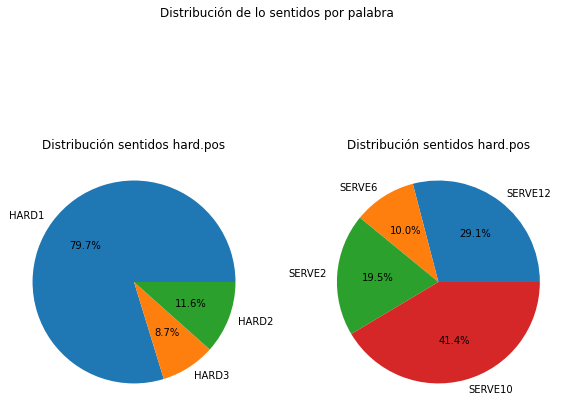

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
fig.suptitle('Distribución de lo sentidos por palabra')

ax1.pie(list(conteo_instancias['hard.pos'].values()), labels=list(conteo_instancias['hard.pos'].keys()), autopct="%.1f%%")
ax1.set_title("Distribución sentidos hard.pos")

ax2.pie(conteo_instancias['serve.pos'].values(), labels=conteo_instancias['serve.pos'].keys(), autopct="%.1f%%")
ax2.set_title("Distribución sentidos hard.pos")

In [11]:
df_hard = pd.DataFrame.from_dict(conteo_instancias['hard.pos'], orient='index', columns=['conteo']).reset_index()
df_serve = pd.DataFrame.from_dict(conteo_instancias['serve.pos'], orient='index', columns=['conteo']).reset_index()

Text(0, 0.5, 'Frecuencia')

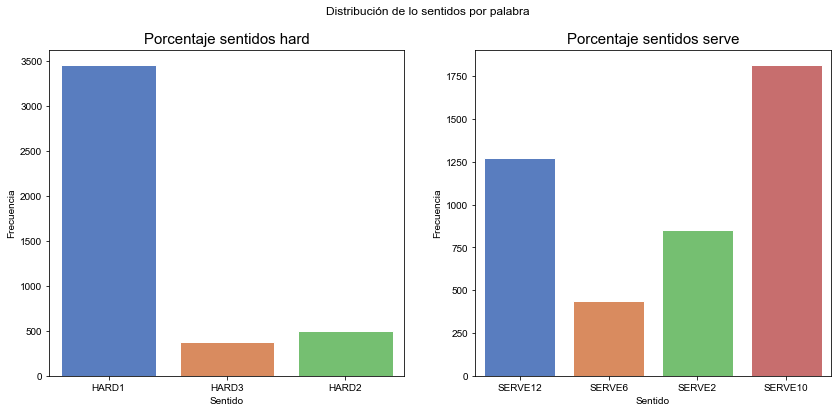

In [12]:
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14,6))
fig2.suptitle('Distribución de lo sentidos por palabra')

sns.set_style("whitegrid")

ax3 = sns.barplot(y='conteo', x='index',  data=df_hard,  ci=None, palette="muted",orient='v', ax=ax3 )
ax3.set_title("Porcentaje sentidos hard", fontsize=15)
ax3.set_xlabel ("Sentido")
ax3.set_ylabel ("Frecuencia")

ax4 = sns.barplot(y='conteo', x='index',  data=df_serve,  ci=None, palette="muted",orient='v',  ax=ax4  )
ax4.set_title("Porcentaje sentidos serve", fontsize=15)
ax4.set_xlabel ("Sentido")
ax4.set_ylabel ("Frecuencia")

* En el contexto, las palabras ambiguas pueden aparecer en diferentes formas gramaticales. Por ejemplo, en el caso de la palabra ambigua *«hard»*, esta aparece tanto la forma base, el adjetivo *«hard»* como en comparativo *«harder»* y como en superlativo *«hardest»*.

Método que muestra las diferentes **versiones de la palabra ambigua** a partir del nombre del archivo del corpus `word` para la palabra ambiguala palabra ambigua:

In [13]:
def tokens(word):
    """
    This takes a target word from senseval-2 and it returns the list of possible tokens for the word
    """
    token = set()
    for inst in senseval.instances(word)[:]:
        token.update([w for (w,t) in inst.context[inst.position:inst.position+1]])
    return list(token)

Mostrar las diferentes versiones de la palabra ambigua

In [14]:
tokens('hard.pos')

['hard', 'harder', 'hardest']

In [15]:
tokens('serve.pos')

['serves', 'serve', 'serving', 'served']

Para verificar si las instancias cumplen con el formato se validan las siguientes condiciones:

1.   Que los valores de las etiquetas y palabras no estén vacías
2.   Que en el contexto solo existan tuplas (palabra, etiqueta)

In [16]:
# Sentidos definidos en el corpus senseval
senseval.fileids()

['hard.pos', 'interest.pos', 'line.pos', 'serve.pos']

In [17]:
# Valición de etiquetas y palabras no vacías para las apariciones de lo sentidos en el corpus
for sense in senseval.fileids():
    instances = senseval.instances(sense)
    count_empty_tuples = 0
    for i,instance in enumerate(instances):
        word, tag = instances[i].context[instances[i].position]
        if word == '':
            print ('existen palabras vacías')
            count_empty_tuples += 1
        if tag == '':
            print ('existen tags vacíos')
            count_empty_tuples += 1
if count_empty_tuples < 1:
  print ('No existen tuplas vacías')

No existen tuplas vacías


In [18]:
import random

# Valición que en el contexto solo existan tuplas con la estructura (palabra, etiqueta)
count_error_tuples = {}

for sense in senseval.fileids():
    tuples_error_list = []
    count_error_tuples[sense] = 0
    instances = senseval.instances(sense)
    for i,instance in enumerate(instances):
        for tuples in instances[i].context:
          if len(tuples) != 2:
            tuples_error_list.append(f"Error en el contexto de la instancia [{i}] con valor '{tuples}' del sentido <<{sense}>>, la tupla no tiene la estructura (word, tag)")
            count_error_tuples[sense] += 1

# Imprime el número de tuplas con error por sentido
for tuples in count_error_tuples:
    print (f"El sentido {tuples} tiene {count_error_tuples[tuples]} de tuplas que no tienen la estructura (word, tag)")

# imprime cinco(5) errores de la lista seleccionados aleatoreamente:
print ("\nEJEMPLOS DE ERRORES:")
for i in range(0,5): print(random.choice(tuples_error_list))

El sentido hard.pos tiene 34 de tuplas que no tienen la estructura (word, tag)
El sentido interest.pos tiene 0 de tuplas que no tienen la estructura (word, tag)
El sentido line.pos tiene 237 de tuplas que no tienen la estructura (word, tag)
El sentido serve.pos tiene 94 de tuplas que no tienen la estructura (word, tag)

EJEMPLOS DE ERRORES:
Error en el contexto de la instancia [2072] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (word, tag)
Error en el contexto de la instancia [1041] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (word, tag)
Error en el contexto de la instancia [2178] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (word, tag)
Error en el contexto de la instancia [1492] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (word, tag)
Error en el contexto de la instancia [2882] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (wor

*   El dataset no contiene valores vacíos de palabra y etiqueta para las palabras de sentidos ambiguos.
*   Se identifican los siguientes errores:

 - El sentido hard.pos tiene 34 de tuplas que no tienen la estructura (word,  - tag)
 - El sentido interest.pos tiene 0 de tuplas que no tienen la estructura (word, tag)
 - El sentido line.pos tiene 237 de tuplas que no tienen la estructura (word, tag)
 - El sentido serve.pos tiene 94 de tuplas que no tienen la estructura (word, tag)

Ejemplos de errores:

 - Error en el contexto de la instancia [1213] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (word, tag)
 - Error en el contexto de la instancia [4015] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (word, tag)
 - Error en el contexto de la instancia [664] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (word, tag)
 - Error en el contexto de la instancia [3341] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (word, tag)
 - Error en el contexto de la instancia [151] con valor 'FRASL' del sentido <<serve.pos>>, la tupla no tiene la estructura (word, tag)





# **Parte 2: Extracción de características**

La representación de las caraterísticas o features es clave en la definición del problema de clasificación a continuación se exploran e implementan diferentes modelos de extracción de características.

### Extracción de características basada en las palabras vecinas

Para una instancia de la palaba ambigua «hard» su contexto se muestra a continuación:

In [19]:
instances_hard = senseval.instances('hard.pos')

In [20]:
inst_hard_1 = instances_hard[1]

In [21]:
inst_hard_1.context

[('clever', 'NNP'),
 ('white', 'NNP'),
 ('house', 'NNP'),
 ('``', '``'),
 ('spin', 'VB'),
 ('doctors', 'NNS'),
 ("''", "''"),
 ('are', 'VBP'),
 ('having', 'VBG'),
 ('a', 'DT'),
 ('hard', 'JJ'),
 ('time', 'NN'),
 ('helping', 'VBG'),
 ('president', 'NNP'),
 ('bush', 'NNP'),
 ('explain', 'VB'),
 ('away', 'RB'),
 ('the', 'DT'),
 ('economic', 'JJ'),
 ('bashing', 'NN'),
 ('that', 'IN'),
 ('low-and', 'JJ'),
 ('middle-income', 'JJ'),
 ('workers', 'NNS'),
 ('are', 'VBP'),
 ('taking', 'VBG'),
 ('these', 'DT'),
 ('days', 'NNS'),
 ('.', '.')]

Suponiendo que el vocabulario usado para crear extraer las características es el siguiente:

`['time', 'would', 'get', 'work', 'find', 'make']`

Entonces el vector de características extraídas para esa instancia sería:

`{'contains(time)': True, 
'contains(would)': False, 
'contains(get)': False, 
'contains(work)': False, 
'contains(find)': False, 
'contains(make)': False}`

Este vector de características indica que en el contexto de la palabra ambigua aparece la palabra *«time»* y no aparecen las palabras *«would»*, *«get»*, *«work»*, *«find»* y *«make»*.

#### 1. Construcción del vocabulario o bags of words. 

Para obtener el vector de características, se debe construir previamente un vocabulario. Para cada una de las palabras del vocabulario, se debe consultar si la palabra aparece en el contexto de la palabra ambigua. Si la palabra del vocabulario aparece en el contexto entonces en el vector de características aparecerá True para esa palabra y si no, False. 

Por ejemplo un vocabulario creado sobre el que se ha construido el vector de características. Este vocabulario es `['time', 'would', 'get', 'work', 'find', 'make']`. Este vocabulario se usará posteriormente para construir el vector de características del ejemplo.

- Utilizar como vocabulario las m palabras más frecuentes que aparecen en las instancias que conforman el conjunto de datos, es decir en las oraciones que contienen las palabras ambiguas y que forman parte del corpus. Entonces, para crear la **bag of words** (bolsa de palabras) se debe extraer el conjunto de las n palabras más frecuentes. Para ello se utiliza la función `nltk.FreqDist()` que proporciona información sobre la distribución de frecuencias de las palabras que aparecen en un texto. 

- Se deben eliminar los signos que puntuación y las palabras vacías (aquellas sin significado como artículos, pronombres o preposiciones, las llamadas stop words en inglés). También se debe eliminar las diferentes formas gramaticales de la palabra ambigua, por ejemplo, para desambiguar la palabra *«hard»* no tendría sentido utilizar la palabra *«harder»* ni la palabra *«hardest»*.

- Para la eliminiar palabras que no aportan valor al análisis se puede realizar una ampliación del conjunto de stopwords con las palabras que se requiere elimiar para aplicar un solo filtro:

In [22]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
OTHER_WORDS = ["''", "'d", "'ll", "'m", "'re", "'s", "'t", "'ve", '--', '000', '1', '2', '3', '4', '5', '6', '8', '10', '15', '30', 'I', 'F', '``', 'also', "don'", 'n', 'one', 'said', 'say', 'says', 'u', 'us']
STOPWORDS_SET = set(stopwords.words('english')).union(set(string.punctuation), set(OTHER_WORDS))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josemiguel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Ejemplo de vocabulario para un tamaño de 6. Por ejemplo, si se quiere entrenar un clasificador que permita identificar los diferentes sentidos de la palabra «hard» y se utilizan para entrenar y validar el modelo las instancias etiquetadas para esta palabra, la bolsa de palabras en el caso de considerar las seis palabras más frecuentes (m=6) sería la presentada anteriormente `['time', 'would', 'get', 'work', 'find', 'make']`.

Método que devuelve el **vocabulario** formado por las `m` palabras más frecuentes en el contexto de una palabra ambigua a partir de un conjunto de instancias `instances` y el conjunto de palabras no útiles `stopwords`

In [23]:
def extract_vocab(instances, stopwords=STOPWORDS_SET, m=250):
    """
    Given a list of senseval instances, return a list of the m most frequent words that
    appears in its context (i.e., the sentence with the target word in), output is in order
    of frequency.
    """
    return [w for w,f in extract_vocab_frequency(instances,stopwords,m)]

In [24]:
def extract_vocab_frequency(instances, stopwords=STOPWORDS_SET, m=250):
    """
    Given a list of senseval instances, return a list of the m most frequent words that
    appears in its context (i.e., the sentence with the target word in), output is in order
    of frequency and includes also the number of instances in which that key appears in the
    context of instances.
    """
    fd = nltk.FreqDist()
    for i in instances:
        target = i.context[i.position:i.position+1][0][0]
        words = (c[0] for c in i.context if not c[0] == target)
        for word in set(words) - set(stopwords):
            fd[word] += 1

    return fd.most_common(m)

Mostrar el vocabulario de tamaño de 6 para la palabra «hard», es decir el vocabulario creado usando las instancias de la a

In [25]:
vocab_6 = extract_vocab(instances_hard, STOPWORDS_SET, m=6)

In [26]:
vocab_6

['time', 'would', 'get', 'work', 'find', 'make']

#### 2. Construcción del conjunto de características basado en palabras vecinas. 

Utilizando un diccionario en Python para guardar el conjunto de características. La clave del diccionario serán las palabras del vocabulario y el valor debe ser un booleano para indicar la aparición o no de las palabras en el contexto. Por ejemplo, en el vector de características `{'contains(time)': True, 'contains(would)': False, 'contains(get)': False, 'contains(work)': False, 'contains(find)': False, 'contains(make)': False}` una de las claves del diccionario es `'contains(time)'` y su valor es `True`  lo que indica que en el contexto de la palabra ambigua aparece la palabra *«time»*.

Método que devuelve el conjunto de características basado en palabras vecinas para una instancia `instance` a partir de un vocabulario `vocab`

In [27]:
def wsd_caracteristicas_palabras_vecinas(instance, vocab, dist=2):
    """
    Create a featureset where every key returns False unless it occurs in the
    instance's context
    """
    features = {}
    try:
        for w in vocab: features[f"contains({w})"] = (w in [tp[0] for tp in instance.context])
    except ValueError:
        pass
    return features

Mostrar el vector de características basado en palabras vecinas para una de las instancias del corpus usando el vocabulario de seis palabras calculado previamente:

In [28]:
wsd_caracteristicas_palabras_vecinas(inst_hard_1, vocab_6, 0)

{'contains(time)': True,
 'contains(would)': False,
 'contains(get)': False,
 'contains(work)': False,
 'contains(find)': False,
 'contains(make)': False}

### Extracción de características basada en características de colocación

**conjunto de características de colocación**. Extraer el vector de características formado por la secuencia de n palabras que ocurren antes de la palabra ambigua y la secuencia de n palabras que ocurren después de la palabra ambigua, los llamados n-gramas.

Para una instancia de la palaba ambigua «hard» su contexto se muestra a continuación:

In [29]:
inst_hard_2737 = instances_hard[2737]

In [30]:
inst_hard_2737.context

[('``', '``'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('interesting', 'JJ'),
 ('place', 'NN'),
 ('to', 'TO'),
 ('work', 'VB'),
 (',', ','),
 ('but', 'CC'),
 ('i', 'PRP'),
 ('can', 'MD'),
 ('see', 'VB'),
 ('why', 'WRB'),
 ('some', 'DT'),
 ('people', 'NNS'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('hard', 'JJ'),
 ('time', 'NN'),
 ('imagining', 'VBG'),
 ('what', 'WP'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('like', 'IN'),
 (',', ','),
 ('"', '"'),
 ('says', 'VBZ'),
 ('nate', 'NNP'),
 ('gossett', 'NNP'),
 ('.', '.')]

Entonces el vector de características de colocación para el bigrama anterior y posterior sería:

`{'previous(have a)': True, 'next(time imagining)': True}` 

Este vector de características indica que antes de la palabra ambigua se encuentran las palabras *«have a»* y después de la palabra ambigua las palabras *«time imagining»*. 

- Usando un diccionario en Python para guardar el conjunto de características, la clave del diccionario debe indicar la secuencia de palabras de contexto y si aparecen antes o después de la palabra ambigua y el valor asociado a la clave debe ser un booleano verdadero. Ejemplo  **n=2**.

- Por ejemplo, en el vector de características `{'previous(have a)': True, 'next(time imagining)': True}` una de las claves del diccionario es `'previous(have a)'` y su valor es `True` lo que indica que antes de la palabra ambigua se encuentran las palabras *«have a»*. En este caso, al tener secuencias de dos palabras (*n=2*), se están considerando bigramas y la ventana tendría tamaño cinco (*2n+1*). Por lo tanto, si la palabra ambigua es *«hard» en el contexto guardado en el campo context de la instancia, aparece la siguiente parte de la frase «have a hard time imagining».

- Se deben tener en cuenta los posibles casos en los que la palabra ambigua aparezca al principio o final de la frase. Por ejemplo, para la instancia cuyo contexto es: `[('some', 'DT'), ('hard', 'JJ'), ('choices', 'NNS'), ('had', 'VBD'), ('to', 'TO'), ('be', 'VB'), ('made', 'VBN'), …]` si n=2 se debe obtener el siguiente vector de características: `{'previous(some)': True, 'next(choices had)': True}`.

Método que devuelve el conjunto de características de colocación para una instancia `instance` usando los n-gramas anterior y posterior donde la longitud de secuencia es de `dist` palabras.

In [31]:
from nltk import ngrams

ngram = ngrams([tp[0] for tp in inst_hard_2737.context],3)

#for grams in ngram:
#  print (grams)

print(list(ngram))


[('``', 'it', "'s"), ('it', "'s", 'a'), ("'s", 'a', 'very'), ('a', 'very', 'interesting'), ('very', 'interesting', 'place'), ('interesting', 'place', 'to'), ('place', 'to', 'work'), ('to', 'work', ','), ('work', ',', 'but'), (',', 'but', 'i'), ('but', 'i', 'can'), ('i', 'can', 'see'), ('can', 'see', 'why'), ('see', 'why', 'some'), ('why', 'some', 'people'), ('some', 'people', 'have'), ('people', 'have', 'a'), ('have', 'a', 'hard'), ('a', 'hard', 'time'), ('hard', 'time', 'imagining'), ('time', 'imagining', 'what'), ('imagining', 'what', 'it'), ('what', 'it', "'s"), ('it', "'s", 'like'), ("'s", 'like', ','), ('like', ',', '"'), (',', '"', 'says'), ('"', 'says', 'nate'), ('says', 'nate', 'gossett'), ('nate', 'gossett', '.')]


In [32]:
from nltk import ngrams

def wsd_caracteristicas_colocacion(instance, vocab, dist=2):
    features = {}
    p = instance.position
    con = instance.context
       
    try:

      if p >= dist:
        features[f"previous({' '.join(w1 for (w1,t1) in con[p-dist:p])})"] = True
      elif p == 1:
        features[f"previous({' '.join(w2 for (w2,t2) in con[p-1:p])})"] = True
      elif p == 0:
        features[f"previous( )"] = True

      if p < len(con) - dist:
        features[f"next({' '.join(w1 for (w1,t1) in con[p+1:p+dist+1])})"] = True
      elif p == len(con) - dist:
        features[f"next({' '.join(w2 for (w2,t2) in con[p+1:p+2])})"] = True
      elif p == len(con) - dist + 1:
        features[f"next( )"] = True

    except ValueError:
        pass      
    return features

In [33]:
wsd_caracteristicas_colocacion(inst_hard_2737, 0, 2)

{'previous(have a)': True, 'next(time imagining)': True}

### Extracción de características por el método de emmbedings (Wordvectors) (Método propuesto)

Se propone como tercer método el uso de vectores de palabras para la extracción de catacterísticas. Este método hace uso de las representaciones vectoriales mediante métodos no supervisados que exploran el contexto de la palabra. La codificación de vectores de palabras se puede utilizar mediante la librería Gensim con el método Word2Vec. El siguiente es el ejemplo de implementación de la extacción de características usando word2vec


In [34]:
import gensim
from gensim.models import Word2Vec

# Create Skip Gram model

def wsd_caracteristicas_wordvectors(instance, dist=2, window=2 ):
    features = {}
    p = instance.position
    con = instance.context
    model = gensim.models.Word2Vec([tp[0] for tp in con], min_count = 1, size = dist,
                                             window = window, sg = 1)

    return model 

OSError: [Errno 45] Operation not supported

# **Parte 3: Entrenamiento de clasificadores**

In [ ]:
from nltk.classify import accuracy, NaiveBayesClassifier, DecisionTreeClassifier
from nltk import ConfusionMatrix

Una vez haya importado los paquetes anteriores, para entrenar un clasificador Naïve Bayes puedes usar el comando `NaiveBayesClassifier.train()` y para evaluarlo `accuracy()`. Se puede utilizar el clasificador entrenado para clasificar una instancia utilizando su método `classify()`.

### 1.	Entrenamiento de dos clasificadores para la palabra «hard». 

In [ ]:
import random
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import itertools

In [ ]:
# Función auxiliar para imprimir la matriz de confusion y las métricas

def plot_confusion_matrix_local(y_test, y_predicted,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_predicted)
    f1score =  np.array2string(f1_score(y_test, y_predicted, average=None), precision=2, separator=',',  suppress_small=True)
    misclass = 1 - accuracy
    cm = confusion_matrix(y_test, y_predicted)

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel(f"Predicted label\n\nAccuracy={float('{:.2f}'.format(accuracy))}\nMisclass={float('{:.2f}'.format(misclass))}\nF1-Score={f1score}")
    plt.show()

In [ ]:
def wsd_clasificador(nltk_classifier, word, features, stopwords_list = STOPWORDS_SET, number=250, distance=2, print_metrics=True, errors=False, confusion_matrix=False):
    """
    This function takes as arguments:
        a target word from senseval2;
        a feature set (this can be wsd_caracteristicas_palabras_vecinas or wsd_caracteristicas_colocacion);
        a list of stopwords 
        a number (defaults to 250), which determines for wsd_caracteristicas_palabras_vecinas the number of
            most frequent words within the context of a given sense that you use to classify examples;
        a distance (defaults to 2) which determines the size of the window for wsd_caracteristicas_colocacion;
        errors (defaults to false), which if set to True prints the errors;
        confusion_matrix (defaults to False), which if set to True prints a confusion matrix.

    Calling this function splits the senseval data for the word into a training set and a test set (the way it does
    this is the same for each call of this function, because the argument to random.seed is specified,
    but removing this argument would make the training and testing sets different each time you build a classifier).

    It then trains the trainer on the training set to create a classifier that performs WSD on the word,
    using features (with number or distance where relevant).

    It then tests the classifier on the test set, and prints its accuracy on that set.

    If error==True, then the errors of the classifier over the test set are printed out.
    For each error four things are recorded: (i) the example number within the test data (this is simply the index of the
    example within the list test_data); (ii) the sentence that the target word appeared in, (iii) the
    (incorrect) derived label, and (iv) the good label.

    If confusion_matrix==True, then calling this function prints out a confusion matrix, where each cell [i,j]
    indicates how often label j was predicted when the correct label was i (so the diagonal entries indicate labels
    that were correctly predicted).
    """
    
    events = [(i, i.senses[0]) for i in senseval.instances(word)]
    senses = list(set(l for (i, l) in events))
    instances = [i for (i, l) in events]
 
    # Extract the vocabulary
    vocab = extract_vocab(instances, stopwords=stopwords_list, m=number)

    # Split the instances into a training and test set    
    n = len(events)
    random.seed(5444522)
    random.shuffle(events)
    training_data = events[:int(0.8 * n)]
    test_data = events[int(0.8 * n):n]

    # Train classifier
    classifier = nltk_classifier([(features(i, vocab, distance), label) for (i, label) in training_data]) 
    
    #NaiveBayesClassifier.train   
     
    good = [label for (i, label) in test_data]
    derived = [classifier.classify(features(i,vocab)) for (i,label) in test_data]
    
    if print_metrics==True:
      print("MODEL METRICS: ")
      print(f"ACCURACY: {accuracy_score(good, derived)}")
      print(f"F1-SCORE: {f1_score(good, derived, average=None)}")

    if errors==True:
                 
        errors = []
        for (i, label) in test_data:
            # Classify the instance
            guess = classifier.classify(features(i, vocab, distance))
            if guess != label:
                con =  i.context
                position = i.position
                item_number = str(test_data.index((i, label)))
                word_list = []
                for (word, tag) in con:
                    word_list.append(word)
                hard_highlighted = word_list[position].upper()
                word_list_highlighted = word_list[0:position] + [hard_highlighted] + word_list[position+1:]
                sentence = ' '.join(word_list_highlighted)
                errors.append([item_number, sentence, guess,label])
        error_number = len(errors)
        
        print('\n' + '\n' + 'There are ' + str(error_number) + ' errors!' + '\n' + '----------------------------' + '\n' + '\n')
        
        for error in errors:
            print(str(errors.index(error)+1) +') ' + 'example number: ' + error[0] + '\n' + '    sentence: ' + error[1] + '\n' + '    guess: ' + error[2] + ';  label: ' + error[3] + '\n' + '\n') 

    if confusion_matrix==True:

        # Get confusion matrix
        cm = ConfusionMatrix(good, derived)
        plot_confusion_matrix_local(good, derived, 
                                    target_names=list(cm._indices.keys()),
                                    title='Matriz de confusión',
                                    cmap="Blues",
                                    normalize=False)

    return classifier

### 2.	Validación de los clasificadores para la palabra «hard».  

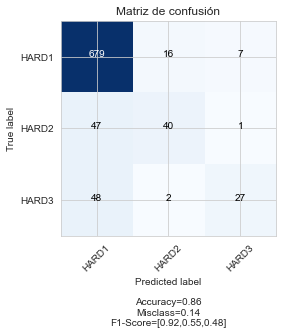

In [ ]:
clasificador_hard_vecinas = wsd_clasificador(NaiveBayesClassifier.train,'hard.pos', wsd_caracteristicas_palabras_vecinas, print_metrics=False, number=250, errors=False, confusion_matrix=True)

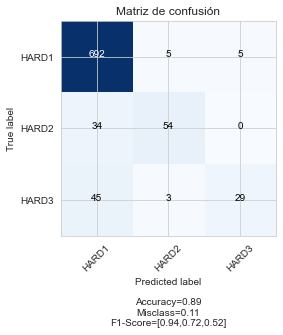

In [ ]:
clasificador_hard_colocacion = wsd_clasificador(NaiveBayesClassifier.train,'hard.pos', wsd_caracteristicas_colocacion, distance=2, print_metrics=False, errors=False, confusion_matrix=True)

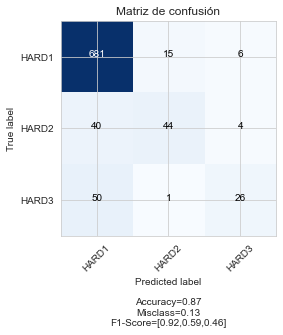

In [ ]:
clasificador_hard_vecinas = wsd_clasificador(DecisionTreeClassifier.train,'hard.pos', wsd_caracteristicas_palabras_vecinas, print_metrics=False, number=250, errors=False, confusion_matrix=True)

In [ ]:
clasificador_hard_colocacion = wsd_clasificador(DecisionTreeClassifier.train,'hard.pos', wsd_caracteristicas_colocacion, distance=2, print_metrics=False, errors=False, confusion_matrix=True)

Comparación de resulados:

Se elabora una matriz de comparación con los resultados obtenidos para los calsificadodores implementados y los modelos de extracción de características:

| Clasificador  | Extracción de   características | F1-SCORE |       |       | ACCURACY |
|---------------|---------------------------------|:--------:|:-----:|:-----:|:--------:|
|               |                                 |   HARD1  | HARD2 | HARD3 |          |
| Bayes         | Palabras vecinas                |   0.92   |  0.55 |  0.48 |   0.86   |
| Bayes         | Colocacion                      |   0.94   |  0.72 |  0.52 |   0.89   |
| Decision Tree | Palabras vecinas                |   0.92   |  0.58 |  0.46 |   0.87   |
| Decision Tree | Colocacion                      |   0.93   |  0.64 |  0.41 |   0.88   |


En la tabla se comparan los valores de **F1-score** y **Accuracy**. Debido a que se presenta un desbalanceo de clases (El sentido HARD1 tiene más ejemplos que los sentidos HARD2 y HARD3 en el dataset). Para estos casos se recomienda aplicar la métrica de F1-Score para mejorar la discrimación por clase. Teniendo en cuenta estas dos métricas podemos observar que el **clasificador de colocación de Bayes presente un mejor desempeño en F1-score y accuracy.**

Teniendo en cuenta los resultados anteriores, podemos observar que para el sentido **HARD3** se tienen los valores más bajos de F1-SCORE lo que indica que este sentidos presenta el mayor número de errores del clasificador.


Para mejorar el desempeño de los clasificadores para el dataset utilizado se han identificado las siguientes optimizaciones aplicables:

*   Mejorar el balance de clases por ejemplo utilizando alguno de los siguientes métodos.
  - Tratando de utilizar un dataset etiquetados más amplio que tenga más ejemplos para los sentidos HARD2 y HARD3
  - Aplicar la métrica de F1-Score para mejorar el entrenamiento del clasificador, penalizando las clases con mucha frecuencia en pro de las clases con menor frecuencia.
  - Utilizar un modelo de muestreo selectivo sobre cada clase para obtener submuestras con mejor balance.

* Utilizar un modelo de extracción de características más avanzado por ejemplo usando representaciones vectoriales o con modelos de lenguaje pre-entrenados.

* Utilizar clasificadores más robustos como redes neuronales o xboosting que puedan capturar una mayor especificidad de las clases menos dominantes.





### 3.	Instancias clasificadas incorrectamente para «hard».   

In [ ]:
clasificador_hard_colocacion = wsd_clasificador(NaiveBayesClassifier.train, 'hard.pos', wsd_caracteristicas_colocacion, distance=2, print_metrics=False, errors=True, confusion_matrix=False)

### 4.	Entrenamiento y validación de dos clasificadores para la palabra «serve».   

In [ ]:
clasificador_serve_vecinas = wsd_clasificador(NaiveBayesClassifier.train, 'serve.pos', wsd_caracteristicas_palabras_vecinas, number=250, print_metrics=False, confusion_matrix=True)

In [ ]:
clasificador_serve_colocacion = wsd_clasificador(NaiveBayesClassifier.train, 'serve.pos', wsd_caracteristicas_colocacion, distance=2, print_metrics=False, errors=False, confusion_matrix=True)

In [ ]:
clasificador_serve_vecinas = wsd_clasificador(DecisionTreeClassifier.train, 'serve.pos', wsd_caracteristicas_palabras_vecinas, number=250, print_metrics=False, confusion_matrix=True)

In [ ]:
clasificador_serve_colocacion = wsd_clasificador(DecisionTreeClassifier.train, 'serve.pos', wsd_caracteristicas_colocacion, distance=2, print_metrics=False, errors=False, confusion_matrix=True)

### 5.	Análisis de resultados del rendimiento de los clasificadores. 

| Clasificador  | Extracción de   características | F1-SCORE |         |        |        | ACCURACY |
|---------------|---------------------------------|:--------:|:-------:|:------:|:------:|:--------:|
|               |                                 |          |         |        |        |          |
|               |                                 |   HARD1  |  HARD2  |  HARD3 |        |          |
| Bayes         | Palabras vecinas                |   0.92   |   0.55  |  0.48  |        |   0.86   |
| Bayes         | Colocacion                      |   0.94   |   0.72  |  0.52  |        |   0.89   |
| Decision Tree | Palabras vecinas                |   0.92   |   0.58  |  0.46  |        |   0.87   |
| Decision Tree | Colocacion                      |   0.93   |   0.64  |  0.41  |        |   0.88   |
|               |                                 |          |         |        |        |          |
|               |                                 |  SERVE10 | SERVE12 | SERVE2 | SERVE6 |          |
| Bayes         | Palabras vecinas                |   0.85   |   0.78  |  0.54  |  0.59  |   0.74   |
| Bayes         | Colocacion                      |   0.83   |   0.76  |  0.72  |  0.48  |   0.77   |
| Decision Tree | Palabras vecinas                |    0.8   |   0.74  |  0.37  |  0.48  |   0.69   |
| Decision Tree | Colocacion                      |   0.74   |   0.59  |  0.64  |  0.17  |   0.66   |

**Observaciones:**

Existen varias razones para considerar cada modelo y sus resultados entre los que se pueden mencionar:

*   Los conjuntos de datos tienen diferentes cantidades de ejemplos y clases
*   El conjunto de **hard.pos** presenta mayor desbalanceo que el conjunto de **serve.pos**
*   A mayor número de clases parace que se requieren modelos más robustos para lograr un mejor desempeño del clasificador.




Se tendrían que utilizar conjuntos de datos que consideraran ambas palabras como datos de entrada con más clases de salida y más instancias para el entrenamiento. para determinar el desempeño de dos o más clasificadores se debe considerar un solo conjunto de datos que sea de igual entrada para los dos modelos.

Un clasificador aleoterio en el mejor de los casos podría lograr un 0.5 de accuracy pero en general puede estar en el orden inferior al 0.2. Con esto en mente podemos ver que el clasificador de bayer con extracción de características basadas en colocación tuvo el mejor desempeño en ambos casos:

*   hard.pos  Accuracy: 0.89
*   serve.pos Accuracy: 0.77

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Parte 4: 
Conclusiones sobre el uso de aprendizaje automático supervisado para desambiguar el sentido de las palabras</span>

Una vez hayas implementado diferentes clasificadores para desambiguar el sentido de diferentes palabras y analizado su desempeño, reflexiona sobre el uso de algoritmos basados en aprendizaje automático supervisado para resolver la tarea de desambiguación del sentido de las palabras. Para ello responde de forma razonada a las siguientes preguntas:

Los clasificadores considerados NayiveBayer y DecisionTree, curiosamente presentan un buen resultado en general para ser modelos muy sencillos, perosolo funcionan adecuadamente para palabras individuales (En los casos utilizados HARD y SERVE) con pocas clases. Si se tratara de utilizar un modelo de generalización que cubriera más palabras y sentidos estos modelos tendrían mucha dificultad debido a la alta dimensionalidad de las características que se requerirían y la cantidad de clases para cada uno de los sentidos. Los modelos son lentos para entrenar con muchos datos, como en el caso de los arboles de decisión que tomaron más de 20 minutos de entrenamiento para un conjunto de características de menos de 10.000 instancias.


Ralizando una revisión de diferentes aproximaciones utilizados e investigación en desambiguación, algunas de las recomendaciones que se han alcanzado para mejorar el desempeño de los sistemas de desambiguación son:

*   Uso de dataset más amplios que senseval2 (Ejemplo senseval 3 o LeskCorpus)
*   Utilizando de modelos de aprendizaje basados en grafos para que se pueda capturar la interrelación de las palabras y los diferente sentidos
*   Utilización de modelos de representación de características basados en vectores (Embeddings)
* Utilizar modelo de lenguaje como BERT o GPT que han sido pre-entrenados con conjuntos masivos de datos.
*   Integrar modelos de aprendizaje supervisado y aprendizaje semi-supervisados con métodoso basados en tesauros y diccionarios (Por ejemplo usando wordnet)


**Referencias:**

- Improved Word Sense Disambiguation Using Pre-Trained Contextualized Word Representations, Hadiwinoto et all. https://arxiv.org/abs/1910.00194
- Named Entity Disambiguation Boosted with Knowledge Graphs. https://towardsdatascience.com/
- NE disambiguation boosted with knowledge graphs. named-entity-disambiguation-boosted-with-knowledge-graphs-4a93a94381ef
https://web.stanford.edu/~jurafsky/slp3/slides/Chapter18.wsd.pdf
- Word Sense Disambiguation: A Unified Evaluation Framework and Empirical Comparison, Raganato et all. https://www.aclweb.org/anthology/E17-1010.pdf
- Toward Universal Word Sense Disambiguation Using Deep Neural Networks. Valco et all. https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8706934
- Word Sense Disambiguation for 158 Languages using Word Embeddings Only. 
Logacheva et all. https://www.aclweb.org/anthology/2020.lrec-1.728.pdf

